In [73]:
# Instala las librerías necesarias para ejecutar el notebook
%pip install pandas matplotlib numpy seaborn scikit-learn statsmodels scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# FASE 1: ENTENDER LOS DATOS 🔍
## PASO 1: Cargar y Conocer los Datos
Cargaremos el dataset, veremos las primeras filas, identificaremos el número de filas y columnas, y revisaremos qué representa cada variable.

## Sobre el Boston Housing Dataset
El Boston Housing Dataset proviene de información recolectada por el U.S. Census Service sobre viviendas en Boston, MA. Las columnas del dataset representan lo siguiente:
- **CRIM**: Tasa de criminalidad per cápita por ciudad
- **ZN**: Proporción de terreno residencial para lotes > 25,000 pies²
- **INDUS**: Proporción de acres de negocios no minoristas por ciudad
- **CHAS**: Variable dummy del río Charles (1 si limita con el río, 0 si no)
- **NOX**: Concentración de óxidos nítricos (partes por 10 millones)
- **RM**: Promedio de habitaciones por vivienda
- **AGE**: Proporción de viviendas ocupadas construidas antes de 1940
- **DIS**: Distancia ponderada a cinco centros de empleo de Boston
- **RAD**: Índice de acceso a autopistas radiales
- **TAX**: Tasa de impuesto a la propiedad por $10,000
- **PTRATIO**: Proporción alumno-profesor por ciudad
- **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negras por ciudad
- **LSTAT**: % de población de menor estatus socioeconómico
- **MEDV**: Valor mediano de viviendas ocupadas por sus dueños (en miles de dólares)

In [74]:
# Cargar el dataset con nombres de columna personalizados
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
import pandas as pd
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)  # Cargamos el dataset con nombres
df.head()  # Mostramos las primeras filas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Identificamos el número de filas y columnas del dataset.

In [75]:
# Verificamos el número de filas y columnas
df.shape  # (filas, columnas)

(506, 14)

Vemos los nombres de las columnas y su significado.

In [76]:
# Vemos los nombres de las columnas y su significado
df.columns  # Nombres de las variables

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## PASO 2: Verificar Calidad de Datos
Revisamos si hay valores nulos y cuántos faltan por columna.

In [77]:
# Revisamos si hay valores nulos y cuántos faltan por columna
df.isnull().sum()  # Conteo de valores nulos por columna

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Buscamos filas duplicadas en el dataset.

In [78]:
# Buscamos filas duplicadas
df.duplicated().sum()  # Número de filas duplicadas

np.int64(0)

## PASO 3: Estadísticas Descriptivas Básicas
Calculamos media, mediana, mínimo, máximo y desviación estándar de cada variable.

In [79]:
# Calculamos media, mediana, mínimo, máximo y desviación estándar de cada variable
df.describe().T  # Estadísticas básicas por columna

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Calculamos el rango de valores de cada variable numérica.

In [80]:
# Calculamos el rango de valores de cada variable numérica
df.select_dtypes(include='number').agg(['min', 'max'])  # Rango de valores

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187.0,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1,0.871,8.780,100.0,12.1265,24,711.0,22.0,396.90,37.97,50.0


# FASE 2: LIMPIAR Y PREPARAR 🧹
## PASO 4: Manejar Datos Faltantes
- Si hay pocos faltantes (<5%), eliminamos esas filas.
- Si hay varios faltantes, imputamos con la mediana (más robusto que la media).
- Verificamos que no se introduzcan sesgos.

> Los algoritmos no pueden trabajar con valores nulos. Para regresión lineal, imputar con mediana es generalmente seguro.

In [81]:
# PASO 4: Manejar datos faltantes
porcentaje_nulos = df.isnull().mean() * 100  # Porcentaje de nulos por columna
if (porcentaje_nulos.max() < 5):
    # Si hay pocos faltantes (<5%), eliminamos esas filas
    df = df.dropna()
else:
    # Si hay varios faltantes, imputamos con la mediana
    df = df.fillna(df.median())
df.isnull().sum()  # Verificamos que no queden nulos

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## PASO 5: Detectar y Tratar Outliers
- Creamos boxplots de cada variable para visualizar valores extremos.
- Identificamos outliers usando el método IQR:
  - Outlier si: valor < Q1 - 1.5×IQR o valor > Q3 + 1.5×IQR
- Decisión:
  - Si son <5% del total, se pueden eliminar.
  - Si son >5%, mantenerlos o aplicar transformación logarítmica.

> Los outliers distorsionan los coeficientes de regresión lineal. Analiza si tienen sentido antes de eliminarlos.

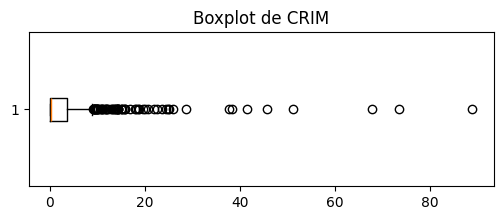

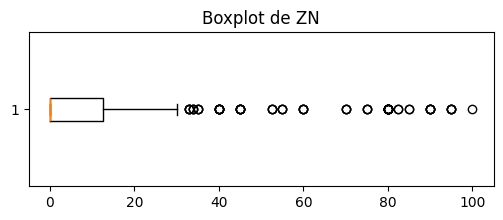

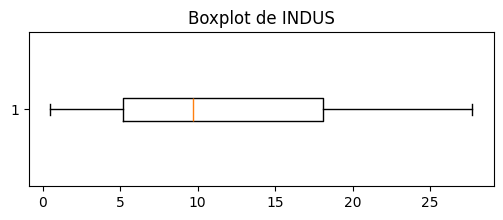

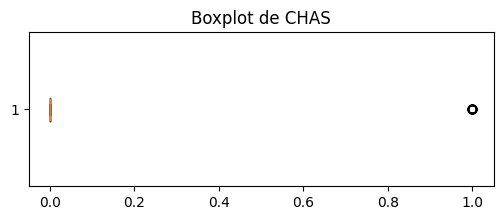

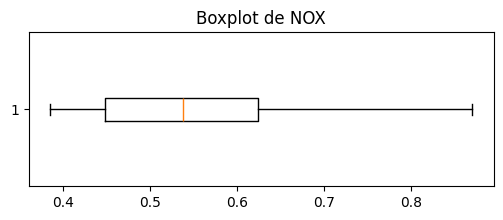

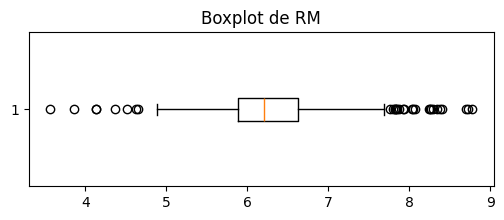

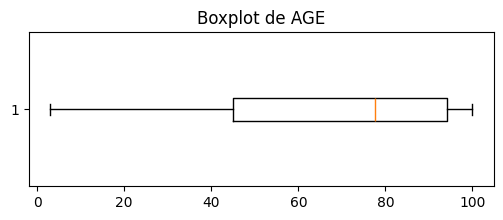

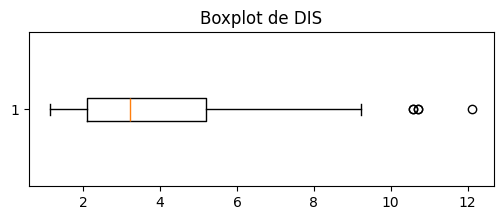

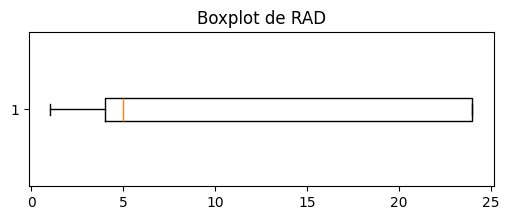

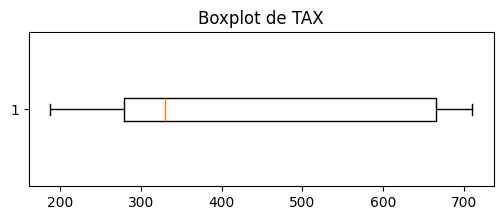

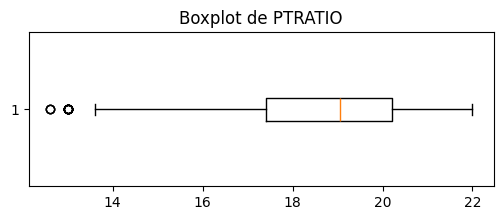

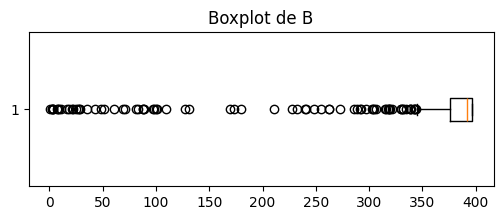

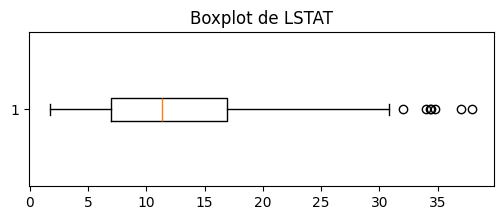

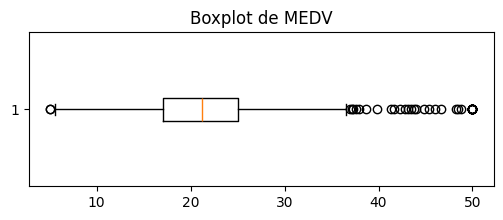

CRIM: 66 outliers (13.04%)
ZN: 68 outliers (13.44%)
INDUS: 0 outliers (0.00%)
CHAS: 35 outliers (6.92%)
NOX: 0 outliers (0.00%)
RM: 30 outliers (5.93%)
AGE: 0 outliers (0.00%)
DIS: 5 outliers (0.99%)
RAD: 0 outliers (0.00%)
TAX: 0 outliers (0.00%)
PTRATIO: 15 outliers (2.99%)
B: 75 outliers (15.43%)
LSTAT: 6 outliers (1.23%)
MEDV: 33 outliers (6.88%)


In [82]:
# PASO 5: Detectar y tratar outliers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot de {col}')
    plt.show()
    
# Detectamos outliers usando el método IQR
outliers = {}
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outliers[col] = df[col][mask]
    print(f'{col}: {mask.sum()} outliers ({100*mask.sum()/len(df):.2f}%)')
    # Decisión: Si <5% del total, se pueden eliminar
    if mask.sum()/len(df) < 0.05:
        df = df[~mask]  # Eliminar outliers
    # Si >5%, se recomienda mantenerlos o transformar
    # Ejemplo de transformación logarítmica: df[col] = np.log1p(df[col])

## PASO 6: Analizar Distribuciones
- Creamos histogramas de todas las variables para analizar su forma.
- Identificamos si alguna variable está muy sesgada (asimétrica).
- Si hay sesgo fuerte, aplicamos transformación logarítmica.

> La regresión lineal funciona mejor cuando las variables tienen distribuciones normales o simétricas. Variables como CRIM, DIS y LSTAT suelen necesitar transformación.

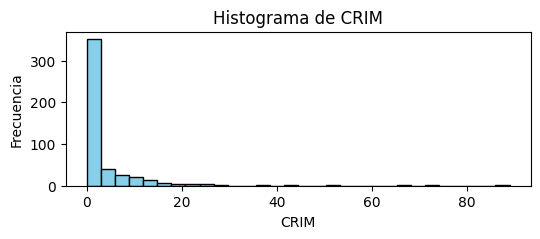

CRIM: sesgo = 5.41
Sugerencia: aplicar transformación logarítmica a CRIM


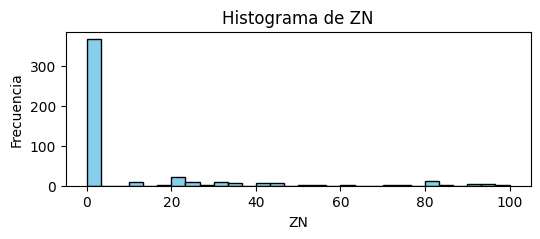

ZN: sesgo = 2.40
Sugerencia: aplicar transformación logarítmica a ZN


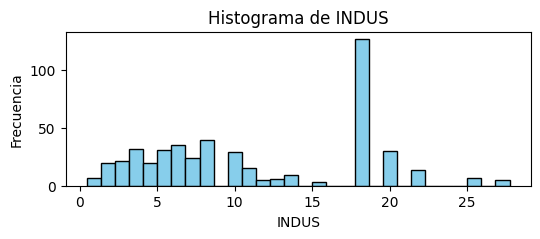

INDUS: sesgo = 0.27


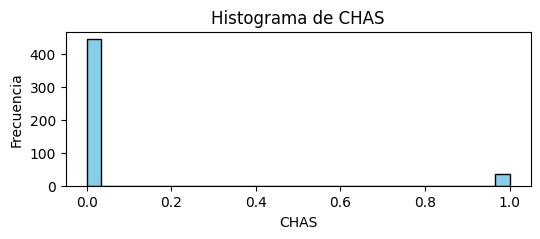

CHAS: sesgo = 3.30
Sugerencia: aplicar transformación logarítmica a CHAS


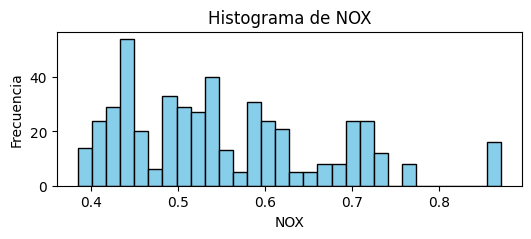

NOX: sesgo = 0.80


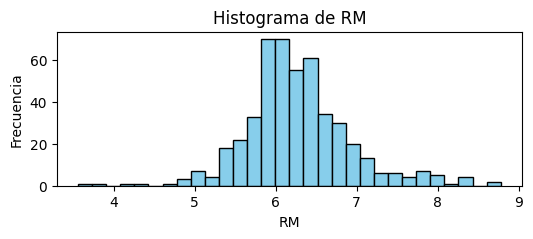

RM: sesgo = 0.46


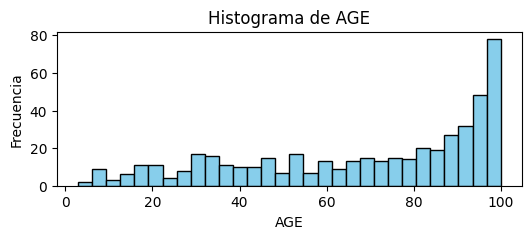

AGE: sesgo = -0.60


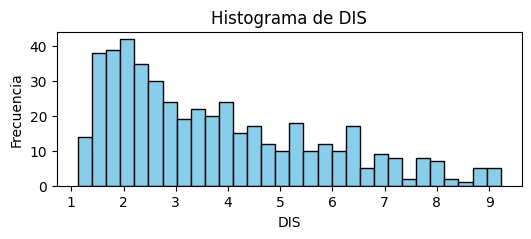

DIS: sesgo = 0.82


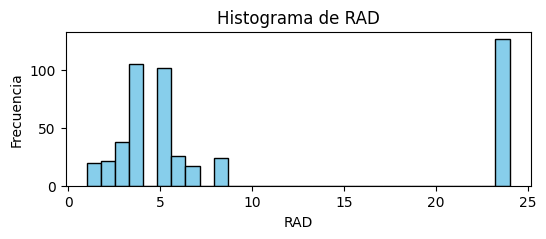

RAD: sesgo = 0.98


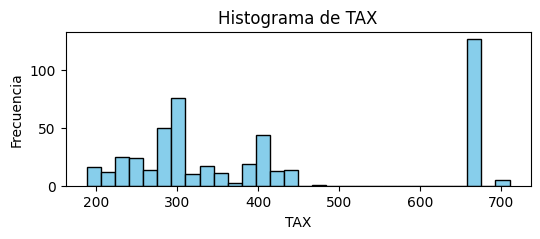

TAX: sesgo = 0.65


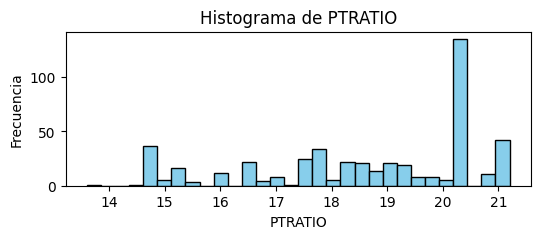

PTRATIO: sesgo = -0.68


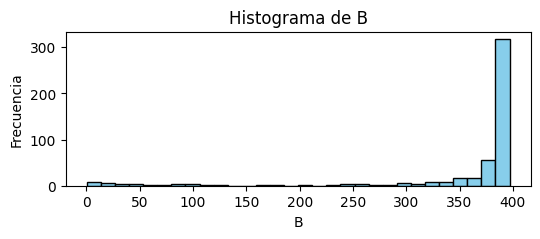

B: sesgo = -2.92
Sugerencia: aplicar transformación logarítmica a B


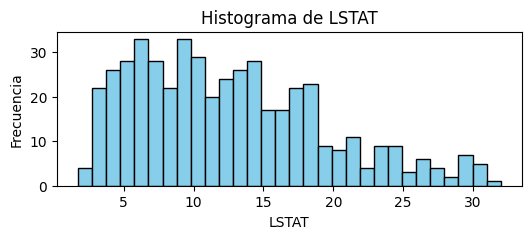

LSTAT: sesgo = 0.70


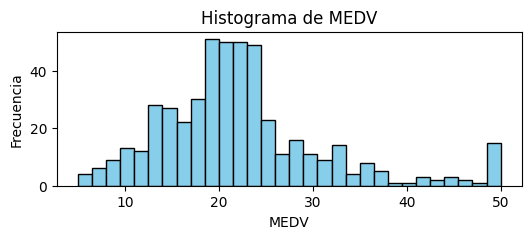

MEDV: sesgo = 1.16
Sugerencia: aplicar transformación logarítmica a MEDV


In [83]:
# PASO 6: Analizar distribuciones
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,2))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Analizamos el sesgo
    sesgo = df[col].skew()
    print(f'{col}: sesgo = {sesgo:.2f}')
    # Si el sesgo es fuerte (>1 o <-1), sugerimos transformación logarítmica
    if abs(sesgo) > 1:
        print(f'Sugerencia: aplicar transformación logarítmica a {col}')

# FASE 3: EXPLORAR RELACIONES 🔗
## PASO 7: Matriz de Correlación
- Calculamos la correlación entre todas las variables.
- Creamos un heatmap para visualizar las correlaciones.
- Identificamos variables muy correlacionadas con MEDV (buenas predictoras) y entre sí (multicolinealidad, |r| > 0.8).

> La matriz de correlación ayuda a elegir variables útiles para predecir MEDV y evitar redundancia entre predictoras.

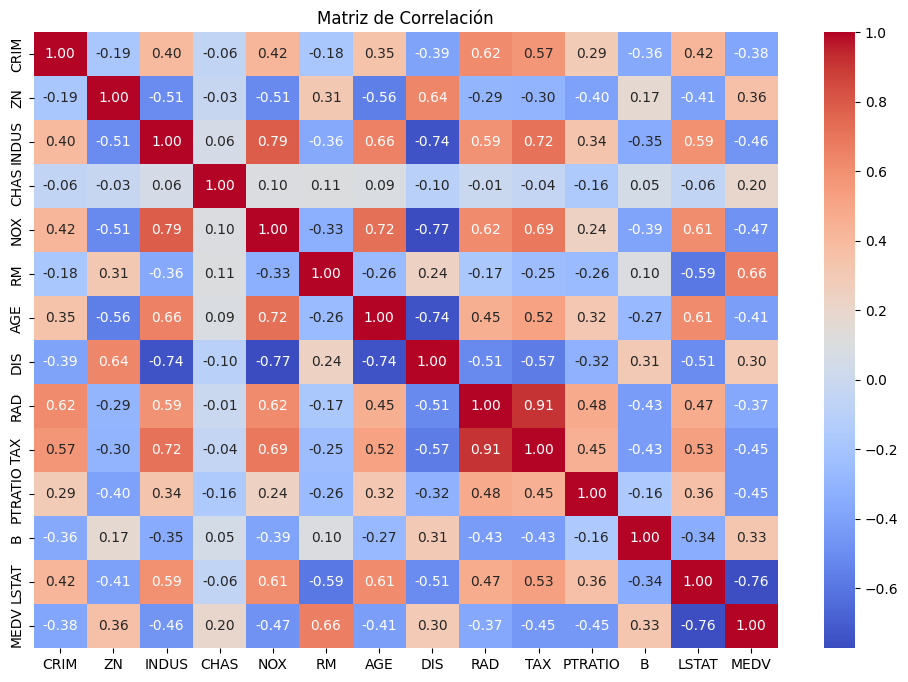

Correlación con MEDV:
MEDV       1.000000
RM         0.663308
ZN         0.363023
B          0.327461
DIS        0.295539
CHAS       0.196915
RAD       -0.366867
CRIM      -0.380835
AGE       -0.413932
PTRATIO   -0.448149
TAX       -0.448297
INDUS     -0.461013
NOX       -0.469889
LSTAT     -0.758625
Name: MEDV, dtype: float64

Variables con multicolinealidad (|r| > 0.8):
RAD y TAX: 0.91
TAX y RAD: 0.91


In [84]:
# PASO 7: Matriz de correlación
import seaborn as sns
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
print('Correlación con MEDV:')
print(corr['MEDV'].sort_values(ascending=False))
print('\nVariables con multicolinealidad (|r| > 0.8):')
for col in corr.columns:
    for col2 in corr.columns:
        if col != col2 and abs(corr.loc[col, col2]) > 0.8:
            print(f'{col} y {col2}: {corr.loc[col, col2]:.2f}')

## PASO 8: Verificar Multicolinealidad (VIF)
- Calculamos el VIF para cada variable.
- Decisión:
  - VIF < 5: OK ✅
  - VIF 5-10: Precaución ⚠️
  - VIF > 10: Problema serio ❌ (eliminar variable)

> El VIF alto indica que dos variables predictoras están muy correlacionadas y el modelo se vuelve inestable.

In [85]:
# PASO 8: Calcular VIF (Factor de Inflación de Varianza)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df.drop('MEDV', axis=1)
X_const = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print(vif)
print('\nVariables con VIF > 10 (problema serio):')
print(vif[vif['VIF'] > 10])

   Variable       VIF
0      CRIM  1.736555
1        ZN  2.092579
2     INDUS  3.984826
3      CHAS  1.103324
4       NOX  4.502168
5        RM  1.765941
6       AGE  3.047573
7       DIS  3.902236
8       RAD  7.482662
9       TAX  8.997499
10  PTRATIO  1.673019
11        B  1.324756
12    LSTAT  2.797155

Variables con VIF > 10 (problema serio):
Empty DataFrame
Columns: [Variable, VIF]
Index: []


# FASE 4: CONSTRUIR EL MODELO 🏗️
## PASO 9: Dividir Datos (Train/Test)
- Separamos los datos en 80% entrenamiento y 20% prueba.
- Usamos random_state fijo para reproducibilidad.
- La división debe ser antes de cualquier escalado.

> Es fundamental tener datos "no vistos" para evaluar la generalización del modelo. Nunca toques el conjunto de test hasta la evaluación final.

In [86]:
# PASO 9: Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Tamaño entrenamiento: {X_train.shape[0]} filas')
print(f'Tamaño prueba: {X_test.shape[0]} filas')

Tamaño entrenamiento: 384 filas
Tamaño prueba: 96 filas


## PASO 10: Entrenar el Modelo de Regresión Lineal Múltiple
- Creamos el modelo LinearRegression().
- Entrenamos con los datos de entrenamiento.
- Obtenemos los coeficientes y el intercepto.

> Aquí el algoritmo aprende la relación entre las variables predictoras y MEDV.

In [87]:
# PASO 10: Entrenar el modelo de regresión lineal múltiple
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('Intercepto:', modelo.intercept_)
print('Coeficientes:')
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f'{nombre}: {coef:.3f}')

Intercepto: 41.212076678651925
Coeficientes:
CRIM: -0.121
ZN: 0.042
INDUS: 0.018
CHAS: 2.620
NOX: -16.525
RM: 3.300
AGE: 0.001
DIS: -1.565
RAD: 0.284
TAX: -0.011
PTRATIO: -1.006
B: 0.009
LSTAT: -0.610


# FASE 5: EVALUAR Y VALIDAR ✅
## PASO 11: Evaluar Precisión del Modelo
- Hacemos predicciones en entrenamiento y test.
- Calculamos R², RMSE y MAE en ambos conjuntos.
- Comparamos resultados para detectar overfitting o underfitting.

> R² alto y diferencia pequeña entre train y test indican buen modelo.

In [88]:
# PASO 11: Evaluar precisión del modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'R² train: {r2_train:.2f}, R² test: {r2_test:.2f}')
print(f'RMSE train: {rmse_train:.2f}, RMSE test: {rmse_test:.2f}')
print(f'MAE train: {mae_train:.2f}, MAE test: {mae_test:.2f}')

R² train: 0.72, R² test: 0.79
RMSE train: 4.66, RMSE test: 4.04
MAE train: 3.27, MAE test: 2.90


## PASO 12: Verificar Supuestos del Modelo (Análisis de Residuos)
- Analizamos los residuos: error = valor_real - valor_predicho.
- Verificamos los 4 supuestos críticos:
  1. Linealidad (residuos vs valores predichos)
  2. Homocedasticidad (varianza constante)
  3. Normalidad de residuos (Q-Q plot)
  4. Independencia de errores (Durbin-Watson)

> Si los supuestos se violan, los coeficientes y predicciones no son confiables.

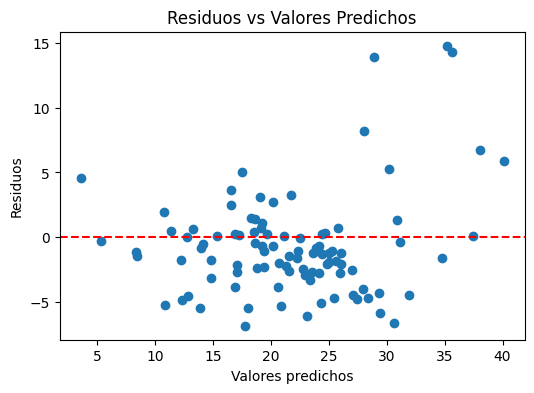

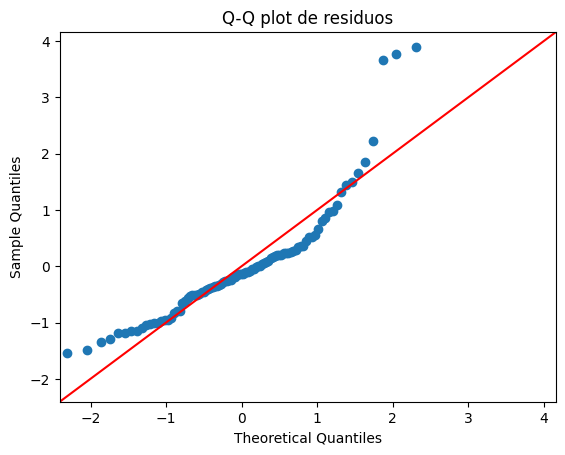

Durbin-Watson: 2.04 (cerca de 2 es ideal)


In [89]:
# PASO 12: Verificar supuestos del modelo (análisis de residuos)
import statsmodels.api as sm
residuos = y_test - y_test_pred
import scipy.stats as stats
plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q plot de residuos')
plt.show()
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos)
print(f'Durbin-Watson: {dw:.2f} (cerca de 2 es ideal)')